In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.linalg import norm
import matplotlib.image as mpimg
import os

In [2]:
#load the data
train_data = np.loadtxt("train_data_6.txt")
valid_data = np.loadtxt("valid_data_6.txt")

#resize the data quantities
train_data = train_data/256./256.
valid_data = valid_data/256./256.

#create the one hot key encodings
train_y = np.zeros((train_data.shape[0], 6))
hot_keys = np.repeat([0, 1, 2, 3, 4, 5,], 110)
train_y[ np.arange(660), hot_keys] = 1
test_y = np.zeros((valid_data.shape[0], 6))
hot_keys = np.repeat([0, 1, 2, 3, 4, 5,], 10)
test_y[ np.arange(60), hot_keys] = 1

In [3]:
def f(x, y, theta):
    bias = np.ones( (1, x.shape[0]))
    x = np.hstack( (bias.T, x))
    return np.sum(np.sum((y - np.dot(x, theta))**2, axis = 1 ))
    
def df(x, y, theta):
    bias = np.ones( (1, x.shape[0]))
    x = np.hstack( (bias.T, x))
    return  2*np.dot(x.T,(np.dot(theta.T, x.T) - y.T).T )

In [4]:
def grad_descent(f, df, x, y, init_t, alpha, EPS=1e-5):
    #y is mutli-dimentional
    
    #EPS = 1e-5   #EPS = 10**(-5)
    prev_t = init_t-10*EPS
    t = init_t.copy()
    max_iter = 9000
    iter  = 0
    while norm(t - prev_t) >  EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*df(x, y, t)
        if iter % 500 == 0:
            print "Iter", iter
            #print "x = (%.3f, %.3f, %.3f), f(x) = %.3f" % (t[0], t[1], t[2], f(x, y, t)) 
            #print "Gradient: ", df(x, y, t), "\n"
        iter += 1
    print "Iter", iter
    return t


In [7]:
np.random.seed(0)
#theta0 = np.random.random((32*32 +1, 6))
theta0 = np.zeros((32*32 +1, 6))
theta = grad_descent(f, df, train_data, train_y, theta0, 0.001, EPS=0.1e-2)
print theta

Iter 0
Iter 500
Iter 1000
Iter 1500
Iter 2000
Iter 2500
Iter 3000
Iter 3500
Iter 4000
Iter 4500
Iter 5000
Iter 5500
Iter 6000
Iter 6500
Iter 7000
Iter 7500
Iter 8000
Iter 8500
Iter 9000
[[ 0.05607482  0.1605586   0.16534181  0.10820196  0.25677507  0.2529158 ]
 [-0.12484632  0.37393445  0.32619799  0.22693799 -0.19225525 -0.60957391]
 [ 0.03041557  0.25522187  0.3745341   0.2008358  -0.29684497 -0.56377221]
 ...
 [ 0.13539931 -0.60023848  0.40494095 -0.33762473  0.46735753 -0.06957705]
 [ 0.05833285 -0.49211562  0.37051935 -0.35856621  0.49731422 -0.07510245]
 [ 0.06676477 -0.43301047  0.34167778 -0.41707074  0.49431241 -0.05229831]]


In [10]:
preds = np.zeros_like(test_y)
#print theta.shape
#print valid_data.shape

#training set score

train_data_ones = np.concatenate((np.ones((1, train_data.shape[0])).T, train_data), axis = 1)
print train_data_ones.shape, theta.shape
preds = np.dot( train_data_ones, theta)

preds_max =  preds.max(axis = 1)
final_preds = np.isin(preds, preds_max).astype(int)

#how many of the hot keys match for validation
print(len(np.where((train_y == final_preds).all(axis =1)==True)[0]))

valid_data_ones = np.concatenate((np.ones((1, valid_data.shape[0])).T, valid_data), axis = 1)
print valid_data_ones.shape, theta.shape
preds = np.dot( valid_data_ones, theta)

preds_max =  preds.max(axis = 1)
final_preds = np.isin(preds, preds_max).astype(int)

#how many of the hot keys match for validation
print(len(np.where((test_y == final_preds).all(axis =1)==True)[0]))

(660, 1025) (1025, 6)
317
(60, 1025) (1025, 6)
24


In [12]:
# Finite Difference checks, 5 elements
h = 0.00001
for i in range(5):
    test_theta_h =  theta.copy()
    test_theta_h[i, 0] += h
    print ((f(train_data, train_y, test_theta_h ) - f(train_data, train_y, theta))/(h))
    print df(train_data, train_y, theta)[i, 0], "\n"

0.00694579966875608
0.00034580094514069515 

0.0352128495251236
0.035212827966209406 

0.019375812598809716
0.01937578899546767 

-0.008749850621825317
-0.008749873670697489 

-0.01720764544188569
-0.017207661958343168 



(1025, 6)
['Alec Baldwin', 'Lorraine Bracco', 'Steve Carell', 'Perri Gilpin', 'Bill Hader', 'Angie Harmon']


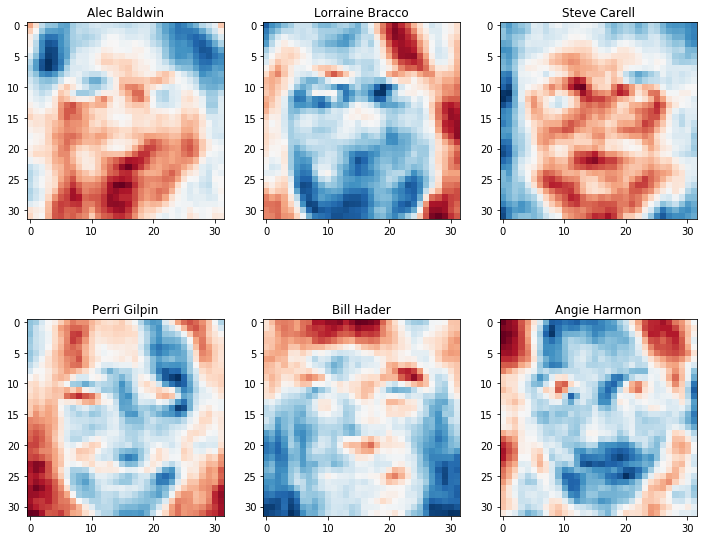

In [15]:
#plot the different 
#for i in range(6):
print theta.shape
names = ["Alec Baldwin", "Lorraine Bracco" , "Steve Carell", "Perri Gilpin", "Bill Hader", "Angie Harmon"]
#names = np.loadtxt("subset_actors.txt", dtype=str)
print names
fig, axarr = plt.subplots(2, 3, figsize = (12, 10))
for i in range(6):
    row = i//3
    col = i%3
    axarr[row, col].imshow(theta[1:, i].reshape(32, 32), cmap = "RdBu")
    axarr[row, col].set_title(names[i])
    
plt.show()